<a href="https://colab.research.google.com/github/sahar-mariam/marvel-level-1-report/blob/main/Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
# choose a binary classification problem
data = load_breast_cancer()
# develop predictors X and target y dataframes
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
y = abs(y-1)
# split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# build a RF model with default parameters
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

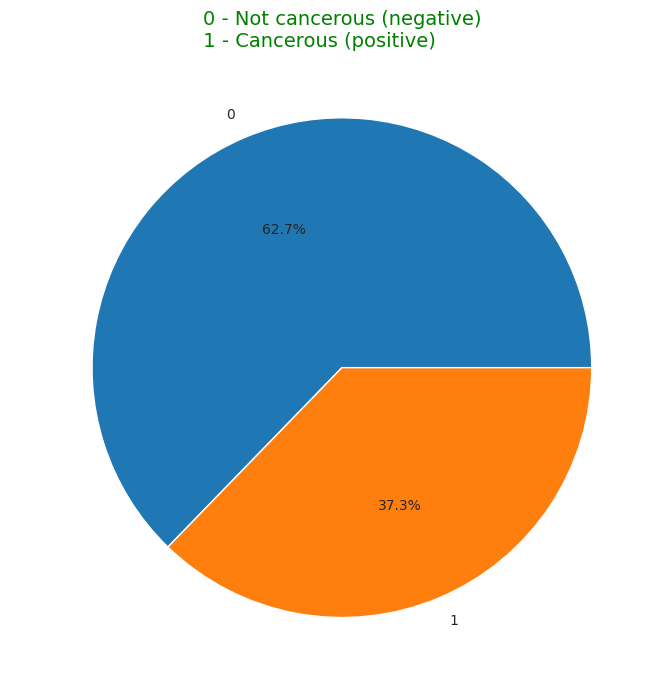

In [3]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)        ', size=14, c='green')
plt.tight_layout(); plt.show()

## Confusion Matrix

In [4]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)
print(confusion_matrix)

[[72  0]
 [ 5 37]]


In [5]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([72,  0,  5, 37])

## Precision

In [6]:
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
precision_positive, precision_negative

(1.0, 0.935064935064935)

## Accuracy

In [7]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.956140350877193

## Recall

In [8]:
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
recall_sensitivity, recall_specificity

(0.8809523809523809, 1.0)

## F1 score

In [9]:
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
f1_positive, f1_negative

(0.9367088607594937, 0.9664429530201343)

In [10]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

